In [1]:
%matplotlib notebook

import sys
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

#mass on a spring: d2x/dt2=-k/m x
#this comment added for the sake of git :^)

def euler(x0,v0,n,h,fig):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    for i in range (n-1):
        t[i+1]=h*(i+1)
        v[i+1]=v[i]-h*x[i]
        x[i+1]=x[i]+h*v[i]
    fig=plt.plot(t,x,label='Position (x)')
    fig=plt.plot(t,v,label='Velocity (v)')
    
def eulererror(x0,v0,n,h,ax):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    for i in range (n-1):
        t[i+1]=h*(i+1)
        v[i+1]=v[i]-h*x[i]
        x[i+1]=x[i]+h*v[i]
    xerr=np.cos(t)-x
    verr=-np.sin(t)-v
    
    ax[0].plot(t,xerr,label='h = '+str(h))
    ax[1].plot(t,verr,label='h = '+str(h))
    
def eulerenergy(x0,v0,n,h,fig):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    for i in range (n-1):
        t[i+1]=h*(i+1)
        v[i+1]=v[i]-h*x[i]
        x[i+1]=x[i]+h*v[i]
    E = x*x+v*v
    
    plt.plot(t,E)
    
def eulerimplicit(x0,v0,n,h,fig):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    for i in range (n-1):
        t[i+1]=h*(i+1)
        v[i+1]=(v[i]-h*x[i])/(1+h*h)
        x[i+1]=(x[i]+h*v[i])/(1+h*h)
    fig=plt.plot(t,x,label='Position (x)')
    fig=plt.plot(t,v,label='Velocity (v)')
    
def eulererrorimp(x0,v0,n,h,ax):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    for i in range (n-1):
        t[i+1]=h*(i+1)
        v[i+1]=(v[i]-h*x[i])/(1+h*h)
        x[i+1]=(x[i]+h*v[i])/(1+h*h)
    xerr=np.cos(t)-x
    verr=-np.sin(t)-v
    
    ax[0].plot(t,xerr,label='h = '+str(h))
    ax[1].plot(t,verr,label='h = '+str(h))
    
def eulerenergyimp(x0,v0,n,h,fig):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    for i in range (n-1):
        t[i+1]=h*(i+1)
        v[i+1]=(v[i]-h*x[i])/(1+h*h)
        x[i+1]=(x[i]+h*v[i])/(1+h*h)
    E = x*x+v*v
    
    plt.plot(t,E)
    
def eulerphaseexp(x0,v0,n,h,fig):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    for i in range (n-1):
        t[i+1]=h*(i+1)
        v[i+1]=v[i]-h*x[i]
        x[i+1]=x[i]+h*v[i]
    fig=plt.plot(x,v,label='Explicit')
    fig=plt.plot(np.cos(t),-np.sin(t),label='Analytic')
    
def eulerphaseimp(x0,v0,n,h,fig):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    for i in range (n-1):
        t[i+1]=h*(i+1)
        v[i+1]=(v[i]-h*x[i])/(1+h*h)
        x[i+1]=(x[i]+h*v[i])/(1+h*h)
    fig=plt.plot(x,v,label='Implicit')
    
def eulerphasesymp(x0,v0,n,h,fig):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    for i in range (n-1):
        t[i+1]=h*(i+1)
        x[i+1]=x[i]+h*v[i]
        v[i+1]=v[i]-h*x[i+1]
    fig=plt.plot(x,v,label='Symplectic')
    
def eulerenergysymp(x0,v0,n,h,fig):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    for i in range (n-1):
        t[i+1]=h*(i+1)
        x[i+1]=x[i]+h*v[i]
        v[i+1]=v[i]-h*x[i+1]
    E = x*x+v*v
    fig=plt.plot(t,E,label='Symplectic')

<IPython.core.display.Javascript object>


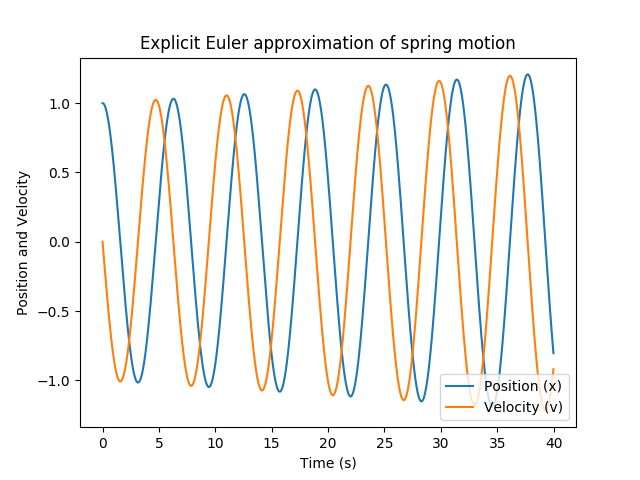

In [208]:
x0 = 1 #m
v0 = 0 #m/s
k = 1 #N/m
m = 1 #kg

f=plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Position and Velocity')
plt.title('Explicit Euler approximation of spring motion')
euler(x0,v0,4000,0.01,f)
plt.legend(loc=4)
f.savefig('eulerexplicit.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


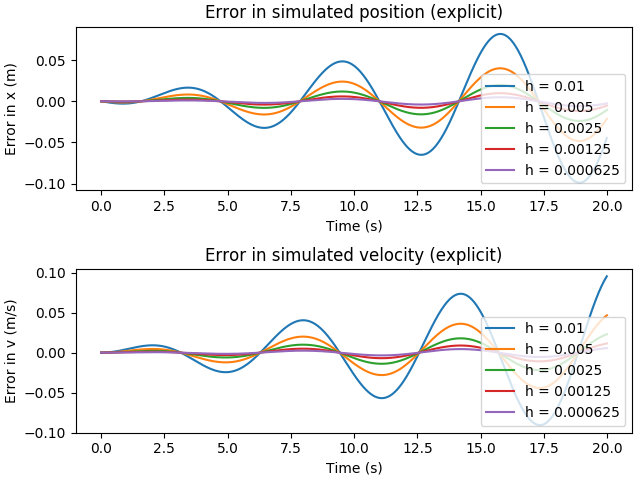

In [209]:
g, axg = plt.subplots(2, constrained_layout=True)

h0=0.01
N0=2000

eulererror(x0,v0,N0,h0,axg)
eulererror(x0,v0,2*N0,h0/2,axg)
eulererror(x0,v0,4*N0,h0/4,axg)
eulererror(x0,v0,8*N0,h0/8,axg)
eulererror(x0,v0,16*N0,h0/16,axg)

axg[0].set_xlabel('Time (s)')
axg[1].set_xlabel('Time (s)')
axg[0].set_ylabel('Error in x (m)')
axg[1].set_ylabel('Error in v (m/s)')
axg[0].set_title('Error in simulated position (explicit)')
axg[1].set_title('Error in simulated velocity (explicit)')
axg[0].legend(loc=4)
axg[1].legend(loc=4)
g.savefig('eulerexpliciterror.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


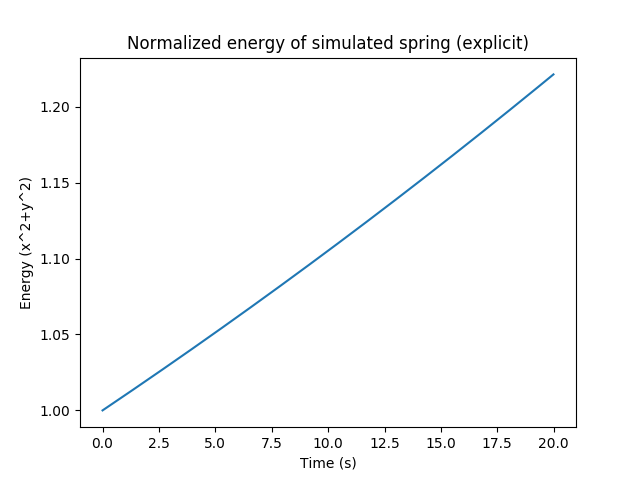

In [210]:
j = plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Energy (x^2+y^2)')
plt.title('Normalized energy of simulated spring (explicit)')
eulerenergy(x0,v0,N0,h0,j)
j.savefig('eulerexplicitenergy.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


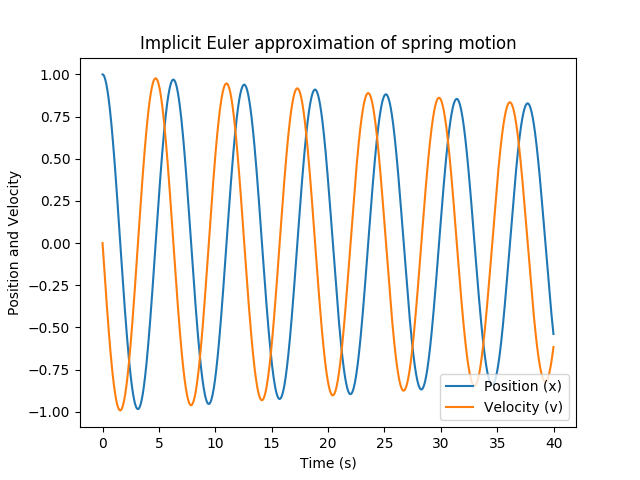

In [211]:
k=plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Position and Velocity')
plt.title('Implicit Euler approximation of spring motion')
eulerimplicit(x0,v0,4000,0.01,k)
plt.legend(loc=4)
k.savefig('eulerimplicit.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


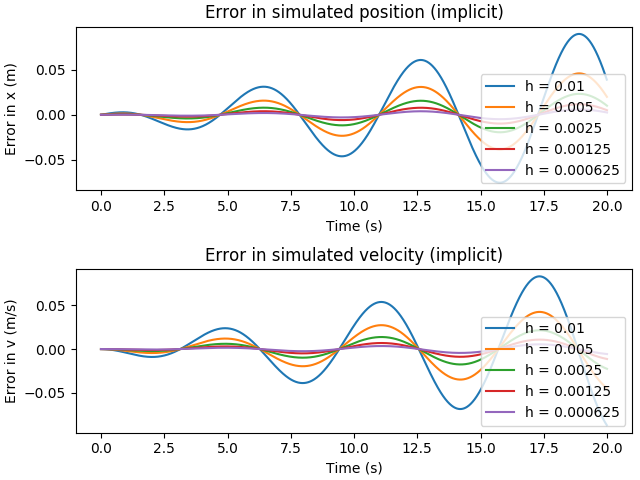

In [212]:
l, axl = plt.subplots(2, constrained_layout=True)

eulererrorimp(x0,v0,N0,h0,axl)
eulererrorimp(x0,v0,2*N0,h0/2,axl)
eulererrorimp(x0,v0,4*N0,h0/4,axl)
eulererrorimp(x0,v0,8*N0,h0/8,axl)
eulererrorimp(x0,v0,16*N0,h0/16,axl)

axl[0].set_xlabel('Time (s)')
axl[1].set_xlabel('Time (s)')
axl[0].set_ylabel('Error in x (m)')
axl[1].set_ylabel('Error in v (m/s)')
axl[0].set_title('Error in simulated position (implicit)')
axl[1].set_title('Error in simulated velocity (implicit)')
axl[0].legend(loc=4)
axl[1].legend(loc=4)
l.savefig('eulerimpliciterror.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


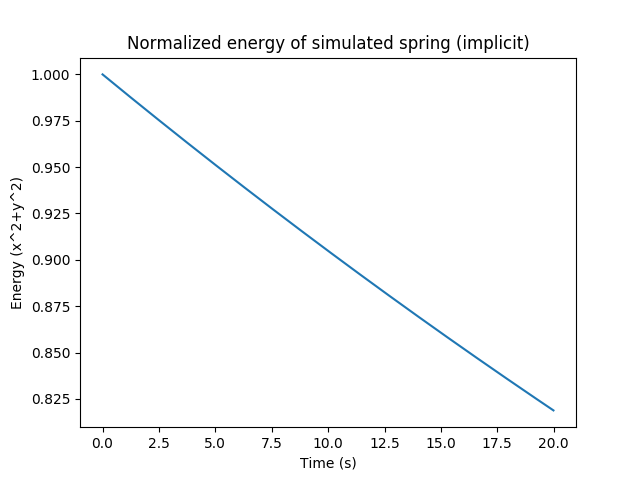

In [213]:
m = plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Energy (x^2+y^2)')
plt.title('Normalized energy of simulated spring (implicit)')
eulerenergyimp(x0,v0,N0,h0,m)
m.savefig('eulerimplicitenergy.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


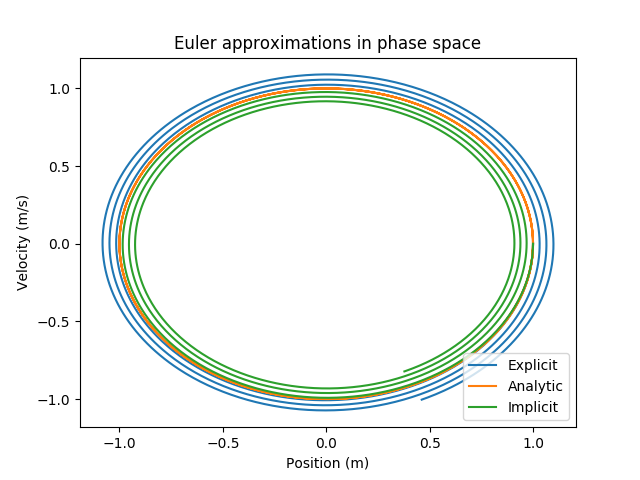

In [221]:
n=plt.figure()

plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Euler approximations in phase space')

eulerphaseexp(x0,v0,N0,h0,n)
eulerphaseimp(x0,v0,N0,h0,n)
plt.legend(loc=4)
n.savefig('eulerphasespace.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


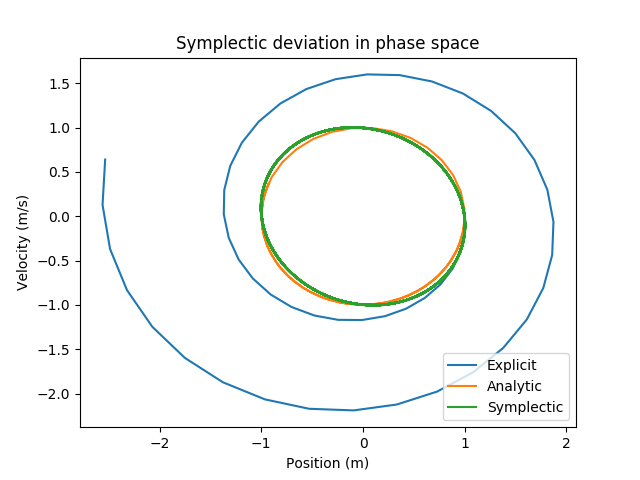

In [226]:
o=plt.figure()
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Symplectic deviation in phase space')

eulerphaseexp(x0,v0,50,20*h0,o)
#eulerphasesymp(x0,v0,2000,h0,o)
#eulerphasesymp(x0,v0,400,5*h0,o)
eulerphasesymp(x0,v0,1000,20*h0,o)
plt.legend(loc=4)
o.savefig('eulerphasesymp.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


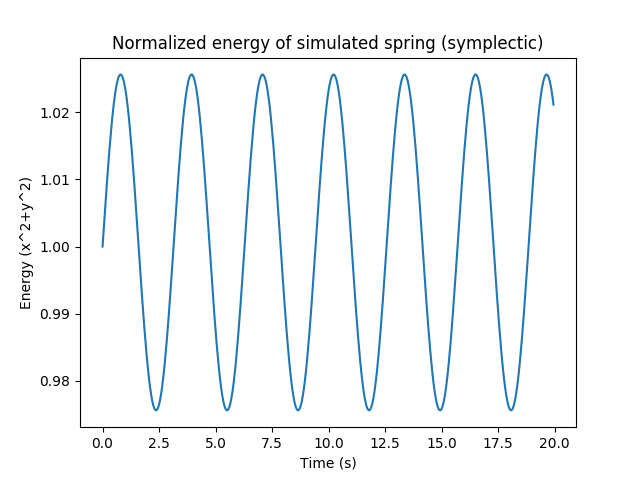

In [228]:
p=plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Energy (x^2+y^2)')
plt.title('Normalized energy of simulated spring (symplectic)')
eulerenergysymp(x0,v0,400,5*h0,p)
p.savefig('eulersymplecticenergy.pdf',bbox_inches='tight')